<a href="https://colab.research.google.com/github/adirifta/Aplikasi-Catatan-Pribadi/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama:** Adi Rifta Dwi Kurniawan <br>
**Email:** adiriftadk@gmail.com <br>
**Domisili:** Kabupaten Mojokerto

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = 'rockpaperscissors/rps-cv-images'
categories = ['rock', 'paper', 'scissors']

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    files = os.listdir(os.path.join(base_dir, category))
    train_files, val_files = train_test_split(files, test_size=0.4, random_state=42)

    for file in train_files:
        shutil.move(os.path.join(base_dir, category, file), os.path.join(train_dir, category, file))

    for file in val_files:
        shutil.move(os.path.join(base_dir, category, file), os.path.join(val_dir, category, file))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
import time
start_time = time.time()

history = model.fit(
    train_generator,
    epochs=10,  # Reduce the number of epochs if needed
    validation_data=val_generator,
    callbacks=[early_stopping],
    verbose=2
)

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print("--- %s minutes ---" % elapsed_time_minutes)

Epoch 1/10
41/41 - 86s - loss: 1.2584 - accuracy: 0.3590 - val_loss: 1.0875 - val_accuracy: 0.5114 - 86s/epoch - 2s/step
Epoch 2/10
41/41 - 84s - loss: 1.0795 - accuracy: 0.4413 - val_loss: 1.0440 - val_accuracy: 0.3858 - 84s/epoch - 2s/step
Epoch 3/10
41/41 - 86s - loss: 1.0263 - accuracy: 0.4611 - val_loss: 0.9869 - val_accuracy: 0.4623 - 86s/epoch - 2s/step
Epoch 4/10
41/41 - 77s - loss: 0.9600 - accuracy: 0.5396 - val_loss: 0.6641 - val_accuracy: 0.8664 - 77s/epoch - 2s/step
Epoch 5/10
41/41 - 83s - loss: 0.8874 - accuracy: 0.6090 - val_loss: 0.5700 - val_accuracy: 0.8961 - 83s/epoch - 2s/step
Epoch 6/10
41/41 - 85s - loss: 0.7101 - accuracy: 0.7386 - val_loss: 0.5236 - val_accuracy: 0.7968 - 85s/epoch - 2s/step
Epoch 7/10
41/41 - 86s - loss: 0.5690 - accuracy: 0.8034 - val_loss: 0.5462 - val_accuracy: 0.7272 - 86s/epoch - 2s/step
Epoch 8/10
41/41 - 86s - loss: 0.5145 - accuracy: 0.8102 - val_loss: 0.2578 - val_accuracy: 0.9384 - 86s/epoch - 2s/step
Epoch 9/10
41/41 - 74s - loss: 0

Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz.png


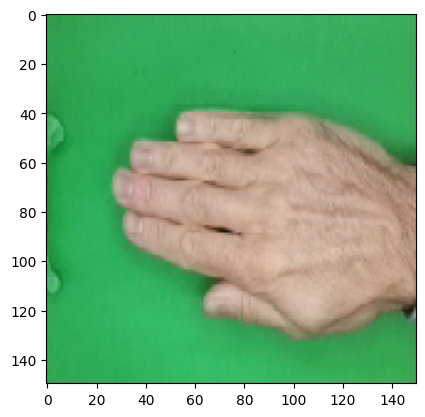

1/1 [==============================] - 0s 100ms/step
Predicted Label: Rock


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

labels = ['Rock', 'Paper', 'Scissors']

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()  # Show the uploaded image

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_class_index = np.argmax(classes[0])
    predicted_label = labels[predicted_class_index]
    print("Predicted Label:", predicted_label)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()